In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

## Load Data

In [2]:
df = pd.read_csv('./data/fake_job_postings.csv')
df_ori = df.copy()
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


## EDA

In [3]:
df.shape[0]

17880

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Harold Uribe Romero\AppData\Local\Temp\ipykernel_2892\4226207916.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(missing_values_count.values/df.shape[0]*100), y=missing_values_count.index, palette="viridis")


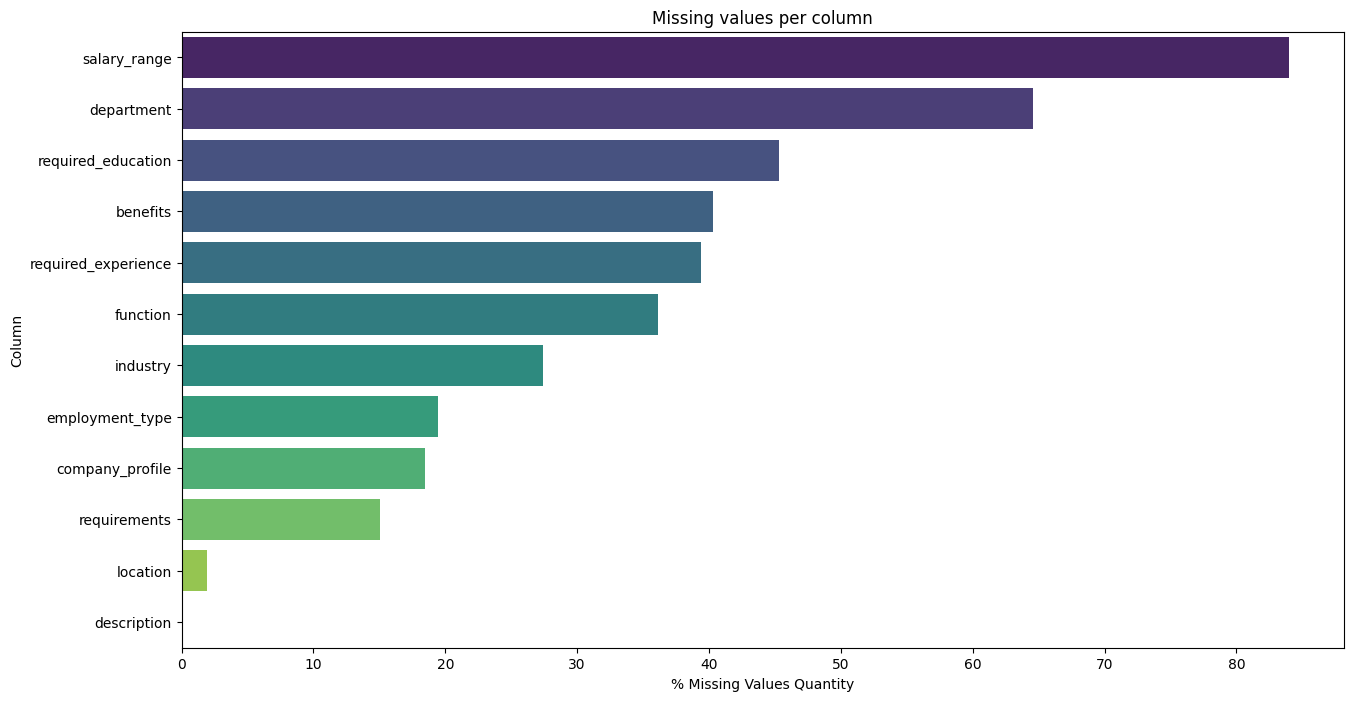

In [6]:
plt.figure(figsize=(15, 8))

# Conteo de valores faltantes
missing_values_count = df.isnull().sum()

# Filtrar y ordenar las columnas con valores faltantes
missing_values_count = missing_values_count[missing_values_count > 0].sort_values(ascending=False)

# Creación de un gráfico de barras para visualizar los valores faltantes
sns.barplot(x=(missing_values_count.values/df.shape[0]*100), y=missing_values_count.index, palette="viridis")
plt.title("Missing values per column")
plt.xlabel("% Missing Values Quantity")
plt.ylabel("Column")

# Mostrar el gráfico
plt.show()

In [7]:
df['fraudulent'].value_counts(normalize=True)*100

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

C:\Users\Harold Uribe Romero\AppData\Local\Temp\ipykernel_2892\1973299769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['fraudulent'].value_counts().index, y=df['fraudulent'].value_counts().values, palette="viridis")


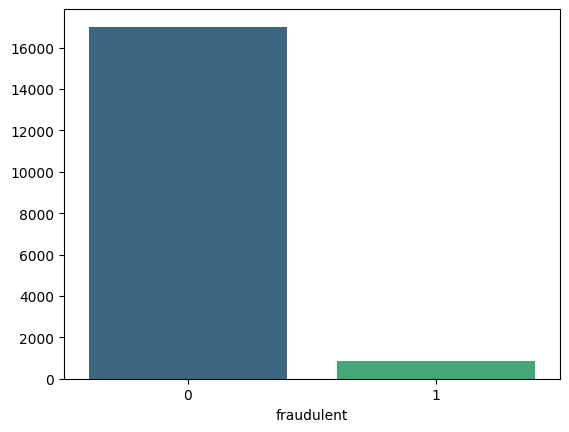

In [8]:
sns.barplot(x=df['fraudulent'].value_counts().index, y=df['fraudulent'].value_counts().values, palette="viridis")
plt.show()


Here we have an unbalanced dataset. An important topic to handle with.

## Cleaning

### Remove unnecessary columns

In [9]:
del df['job_id']

### Location standarizing

In [10]:
# Fill null values on location with "No location"
df['location'].fillna("No location", inplace=True)

# Extract from location the country
df['country'] = df['location'].apply(lambda x: x.split(", ")[0])
df['country'].head()

del df['location']

## Filling missing values

In [11]:
missing_values_count/df.shape[0]*100

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
dtype: float64

In [12]:
del df['salary_range']

In [13]:
## When benefits is not null, then fill with 1, other scenario fill with 0 value
def fill_missing_values(x):
    if type(x) == str:
        return 1
    else:
        return 0


In [14]:
df['benefits'] = df['benefits'].apply(fill_missing_values)
df['company_profile'] = df['company_profile'].apply(fill_missing_values)
df['description'] = df['description'].apply(fill_missing_values)
df['requirements'] = df['requirements'].apply(fill_missing_values)

df.head()

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,Marketing,1,1,1,0,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,Customer Service - Cloud Video Production,Success,1,1,1,1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),NaN,1,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,Account Executive - Washington DC,Sales,1,1,1,1,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,NaN,1,1,1,1,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


### Handling Missing Values

In [15]:
df['department'].fillna("No registered", inplace=True)
df['required_education'].fillna("No registered", inplace=True)
df['required_experience'].fillna("No registered", inplace=True)
df['industry'].fillna("No registered", inplace=True)
df['function'].fillna("No registered", inplace=True)
df['employment_type'].fillna("No registered", inplace=True)

In [16]:
df.head(10)

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,Marketing,1,1,1,0,0,1,0,Other,Internship,No registered,No registered,Marketing,0,US
1,Customer Service - Cloud Video Production,Success,1,1,1,1,0,1,0,Full-time,Not Applicable,No registered,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),No registered,1,1,1,0,0,1,0,No registered,No registered,No registered,No registered,No registered,0,US
3,Account Executive - Washington DC,Sales,1,1,1,1,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,No registered,1,1,1,1,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,Accounting Clerk,No registered,0,1,0,0,0,0,0,No registered,No registered,No registered,No registered,No registered,0,US
6,Head of Content (m/f),ANDROIDPIT,1,1,1,1,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,DE
7,Lead Guest Service Specialist,No registered,1,1,1,1,0,1,1,No registered,No registered,No registered,No registered,No registered,0,US
8,HP BSM SME,No registered,1,1,1,0,0,1,1,Full-time,Associate,No registered,Information Technology and Services,No registered,0,US
9,Customer Service Associate - Part Time,No registered,1,1,1,0,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,US


In [17]:
# df.to_csv('./data/fake_job_postings_clean.csv', index=False)

In [18]:
df.nunique()

title                  11231
department              1338
company_profile            2
description                2
requirements               2
benefits                   2
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
country                   91
dtype: int64

## Split dataframe

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(10728, 3576, 3576)

In [21]:
y_train = df_train.fraudulent
y_val = df_val.fraudulent
y_test = df_test.fraudulent

del df_train['fraudulent']
del df_val['fraudulent']
del df_test['fraudulent']

In [22]:
def mutual_info_fraudulent_score(series):
    return mutual_info_score(series, df_full_train.fraudulent)

In [23]:
col = df_train.columns[1:].tolist()
col

['department',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'country']

In [24]:
mi = df_full_train[col].apply(mutual_info_fraudulent_score)
mi.sort_values(ascending=False)

department             0.049254
industry               0.032352
company_profile        0.031830
has_company_logo       0.027992
country                0.018309
function               0.015248
required_education     0.008106
has_questions          0.004556
required_experience    0.004034
employment_type        0.002541
telecommuting          0.000358
requirements           0.000289
description            0.000210
benefits               0.000038
dtype: float64

In [25]:
cols_final = mi.sort_values(ascending=False).index[0:10]

In [26]:
df_train = df_train[cols_final]
df_val = df_val[cols_final]
df_test = df_test[cols_final]

## Transformation

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [28]:
X_train.shape

(10728, 1243)

## Unbalance handling

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [31]:
len(X_train), len(y_train)

(20382, 20382)

In [32]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Entrenando y evaluando cada modelo
results = {}
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)

    # Calculando métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Guardando resultados
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1, 'ROC AUC Score': roc_auc}

# Imprimiendo los resultados
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Model: Logistic Regression
  Accuracy: 0.9027
  F1 Score: 0.4181
  ROC AUC Score: 0.8618

Model: Decision Tree
  Accuracy: 0.9606
  F1 Score: 0.6199
  ROC AUC Score: 0.8608

Model: Random Forest
  Accuracy: 0.9701
  F1 Score: 0.6646
  ROC AUC Score: 0.8376

Model: SVM
  Accuracy: 0.9544
  F1 Score: 0.6034
  ROC AUC Score: 0.8857



The model with best ROC AUC score is SVM.So, we proceed to visualize the ROC curve for it.

In [34]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

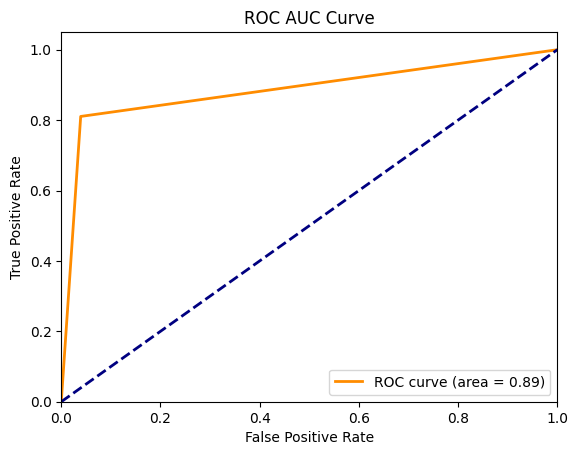

In [39]:
# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Generar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
svm_model = SVC()

# Definición de la cuadrícula de hiperparámetros a buscar
param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto' ]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajuste de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros y puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 4 candidates, totalling 20 fits


({'C': 1, 'gamma': 'scale'}, 0.97321168824948)

## Best hyperparameters

C = 1  
gamma = scale

In [57]:
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 1, 'gamma': 'scale'}


In [60]:
best_c = best_params['C']
best_gamma = best_params['gamma']

# best_c, best_gamma

svm_model = SVC(C=best_c, gamma=best_gamma)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


In [62]:
# Evaluation metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.9544183445190156
F1 Score:  0.6034063260340633
ROC AUC Score:  0.885655284608731


## Save the model

In [58]:
import pickle

In [63]:
output_file = 'model.bin'

f_out = open(output_file, 'wb')
pickle.dump((dv, svm_model), f_out)
f_out.close()

## Load Model

In [64]:
input_file = 'model.bin'

# Load the model from the pickle file
with open(input_file, 'rb') as f_in: 
    dv, svm_model = pickle.load(f_in)

## Test the model

In [100]:
# generate a random integer from 0 to len(df_test)

sample = np.random.randint(0, len(df_test))
sample

2598

In [101]:
job = df_test.iloc[sample]
# .to_dict(orient='records')[0]
job

department                Operations
industry               No registered
company_profile                    1
has_company_logo                   1
country                           US
function                       Other
required_education     No registered
has_questions                      1
required_experience    No registered
employment_type        No registered
Name: 758, dtype: object

In [102]:
X_test = dv.transform([job])
y_pred = svm_model.predict(X_test)[0]
y_pred

0

In [103]:
y_test.iloc[sample]

0

In [150]:
def clean (job):
    df = pd.DataFrame([job])
    if 'job_id' in df.columns:
        del df['job_id']
    if 'salary_range' in df.columns:
        del df['salary_range']

    if 'fraudulent' in df.columns:
        del df['fraudulent']

    df['location'].fillna("No location", inplace=True)
    df['country'] = df['location'].apply(lambda x: x.split(", ")[0])
    del df['location']

    df['benefits'] = df['benefits'].apply(fill_missing_values)
    df['company_profile'] = df['company_profile'].apply(fill_missing_values)
    df['description'] = df['description'].apply(fill_missing_values)
    df['requirements'] = df['requirements'].apply(fill_missing_values)

    df['department'].fillna("No registered", inplace=True)
    df['required_education'].fillna("No registered", inplace=True)
    df['required_experience'].fillna("No registered", inplace=True)
    df['industry'].fillna("No registered", inplace=True)
    df['function'].fillna("No registered", inplace=True)
    df['employment_type'].fillna("No registered", inplace=True)

    df = df [['department','company_profile','description','requirements','benefits','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','country']]

    return df.to_dict(orient='records')[0]

In [157]:
job ={'job_id': 4351,
  'title': 'Assembly & Test Engineer',
  'location': 'US, TX, Houston',
  'department': 'Engineering',
  'salary_range': nan,
  'company_profile': nan,
  'description': "Corporate overviewAker Solutions is a global provider of products, systems and services to the oil and gas industry. Our engineering, design and technology bring discoveries into production and maximize recovery from each petroleum field. We employ approximately 28,000 people in about 30 countries. Go to #URL_0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae# for more information on our business, people and values.We are looking for individuals who are prepared to take a position. Not only a position within Aker Solutions, but also a position on the exciting challenges the global oil and gas industry faces now and in the future.Aker Solutions' Subsea team based in Houston, TX is responsible for design, engineering, procurement and assembly/test of complex subsea systems. We need new talents who can strengthen our team and support our ambitious growth plans within the subsea market. We are looking for: Assembly &amp; Test Engineer.Responsibilities and tasks • Assembly and Test Engineer initiates work tasks to be carried out by the workshop, follows the quality standards and plans the use of resources in order to increase the efficiency of the organization• Responsible for delivering on time according to plans and manages the day-to-day work tasks in a cost effective, safe, and efficient manner• Create work orders and issue work packages in accordance with contract/project requirements and according to procedure• Arrange and call for pre-job meeting with work shop personnel • Participate on hand-over (tool box) meetings in work shop• Responsible for updating work packages related to specific project needsor NCR (CQN) reports• Follow-up progress in workshop and respond without delay on requests for support• Making requisitions towards supply chain to handle unplanned activities• Inform project manager or line manager when Variation Orders is required, for additional work on existing SOW or when change in original SOW• Continuously verify that all relevant documents are completed according to job package procedure • Evaluate the risk of operations and the compliance with laws, standards and policies• Participates in SAFOP/SJA and other HSE related activities in WS• Make sure that special tools and equipment to the planned work (according to work order/package) in assigned projects are available and certified • Control/monitor that necessary materials are received and in place before start of assembly and test• Contribute to the design and improvement of special tools to perform the work in the workshop• Inform and if applicable submit formal status reports to project manager on assigned work tasks/SOW • Write NCRs when deviation is detected• Provide Project manager with input to lessons learned• Participate and contribute with expertise in Tender work",
  'requirements': 'Qualifications &amp; personal attributes • Mechanical/technical experience and insight, engineering degree or relevant business experience• Preferably 3-5 years’ experience in Subsea Workshop or similar industry• Structured and methodical• Strong interpersonal skills with the ability to work effectively both within a team environment and with limited supervision, ability to take lead • SAP and Microsoft Office skills preferable• Fluent in English with good verbal and written communication skillsCompany values:• Ensure understanding of HSE standards, model HSE behaviours, minimize accidents• Ensure team complies with policies and procedures• Create and build cohesive teamwork• Enhance client satisfaction on all products, service and relationship with company',
  'benefits': 'We offer • Friendly colleagues in an industry with a bright future.• An environment where you are encouraged to develop your skills and share your knowledge with your colleagues.• Competitive benefits and strong focus on work-life balance.',
  'telecommuting': 0,
  'has_company_logo': 0,
  'has_questions': 0,
  'employment_type': nan,
  'required_experience': nan,
  'required_education': nan,
  'industry': 'Oil & Energy',
  'function': 'Engineering'}

NameError: name 'nan' is not defined

In [149]:
ejemplo = clean(job)
ejemplo

{'department': 'Development',
 'company_profile': 1,
 'description': 1,
 'requirements': 1,
 'benefits': 1,
 'telecommuting': 0,
 'has_company_logo': 1,
 'has_questions': 0,
 'employment_type': 'Full-time',
 'required_experience': 'Mid-Senior level',
 'required_education': "Bachelor's Degree",
 'industry': 'Information Technology and Services',
 'function': 'Information Technology',
 'country': 'GB'}

In [147]:
X = dv.transform([ejemplo[0]])
X
y_pred = model.predict(X)
# result = {
#  'job': bool(y_pred)}
print(y_pred)

[0]


## Example

In [172]:
ejemplo = df_ori[df_ori['fraudulent']==1].sample(1).to_dict(orient='records')
for key, value in ejemplo[0].items():
    if isinstance(value, float) and np.isnan(value):
        ejemplo[0][key] = None  # O cualquier otro valor que prefieras
ejemplo[0]


{'job_id': 5745,
 'title': 'Account Sales Managers $80-$130,000/yr',
 'location': 'US, NY, Long Island',
 'department': None,
 'salary_range': None,
 'company_profile': 'We have aggressive growth plans in place for the coming years. We provide a much needed service in facilitating the growth of small and medium size business with innovative financing products to their clients.We, at Oak Tree Financing, commit our energies, intellect and knowledge to helping small and medium size business owners and entrepreneurs with extraordinary financing solutions to clients. We believe in providing the highest possible level of service and delivering superior results. We are committed to their financial well-being. With 67% of the population having No Credit or Bad Credit our financing products have helped business owners increase their sales on average by 30%.',
 'description': 'We provide No Credit Check Financing to customers of Small and Medium size Businesses and can help 90% of the industries

In [173]:
ejemplo = df_ori.sample(1).to_dict(orient='records')
for key, value in ejemplo[0].items():
    if isinstance(value, float) and np.isnan(value):
        ejemplo[0][key] = None  # O cualquier otro valor que prefieras
ejemplo[0]

{'job_id': 423,
 'title': 'Senior Frontend Developer',
 'location': 'NL, , Amsterdam',
 'department': 'IT',
 'salary_range': None,
 'company_profile': 'About the CompanyWe are ticketscript - the European market leaders in digital self-ticketing. Whether it’s massive dance events, festivals, gigs, outdoor cinemas, fairs, theater shows, exhibitions, comedy nights, or award ceremonies - we do them all! We believe in empowering our customers. Their success is our success. So far over 50,000 events have worked with us - and this is only the beginning. We have offices in London, Amsterdam, Antwerp, Berlin and Barcelona and are rapidly expanding across Europe.',
 'description': 'About the CompanyWe are ticketscript - the European market leader in digital self-ticketing. Whether it’s massive dance events, festivals, gigs, outdoor cinemas, fairs, theater shows, exhibitions, comedy nights, or award ceremonies - we do them all! We believe in empowering our customers. Their success is our success.